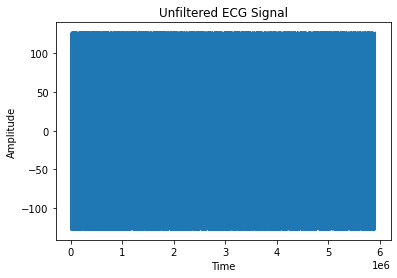

(5914000,)


In [2]:
#Reading signals 

from scipy import signal
import matplotlib.pyplot as plot
import numpy as np
data=np.fromfile('a01.dat',dtype='byte')
#file=open("x01.dat","rb")
#data=file.read()
plot.plot(data)

plot.title('Unfiltered ECG Signal')
plot.xlabel('Time')
plot.ylabel('Amplitude')
plot.show()

print(data.shape)




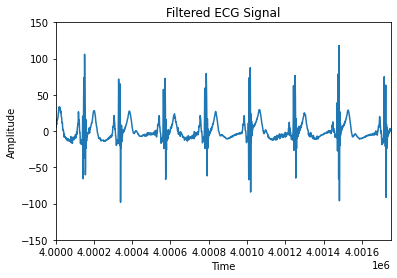

(5914000,)


In [83]:
# Filtering 

filt= signal.butter(4,[0.5,100],'bp',output='sos',fs=300)
filtered=signal.sosfilt(filt,data)
plot.plot(filtered)
plot.xlim(4000000,4001750)
plot.ylim(-150,150)
plot.title('Filtered ECG Signal')
plot.xlabel('Time')
plot.ylabel('Amplitude')
plot.show()


#filt= signal.butter(4,[0.5,150],'bp',output='sos',fs=350)
#filtered=signal.sosfilt(filt,data)
#plot.plot(filtered)
#plot.xlim(4000000,4001750)
#plot.ylim(-150,150)
#plot.show()

#filt= signal.butter(4,[0.05,100],'bp',output='sos',fs=250)
#filtered=signal.sosfilt(filt,data)
#plot.plot(filtered)
#plot.xlim(4000000,4001750)
#plot.ylim(-150,150)
#plot.show()

print(filtered.shape)

In [84]:
# RR-Interval calculation

from scipy import signal
import matplotlib.pyplot as plot
import numpy as np
qrs=np.fromfile('a01.qrs',dtype='byte')
print(len(qrs))
rr=[]
for i in range(0,len(qrs)):
    if(qrs[i]>40):
        rr.append(qrs[i])
rr=np.array(rr,'float32')
print(len(rr))

59878
29077


In [85]:
# RR - Interval calculation

qrs2=np.fromfile('x01.qrs',dtype='byte')
print(len(qrs2))
for j in range(0,25):
    print(qrs2[j])
rr2=[]
for i in range(0,len(qrs2)):
    if(qrs2[i]>40):
        rr2.append(qrs2[i])
rr2=np.array(rr2,'float32')
print(len(rr2))

72944
0
-20
0
0
57
-16
0
64
-43
65
-67
67
-81
4
85
4
76
4
76
4
77
4
77
4
80
36292


In [86]:
import tensorflow as tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Conv1D,BatchNormalization,Activation,MaxPool1D,Dropout,Flatten,Dense
#Feature Extraction layer
flayer = tensorflow.keras.models.Sequential()
flayer.add(Conv1D(filters=45,kernel_size=32,padding='same',kernel_initializer='he_normal'))
flayer.add(BatchNormalization())
flayer.add(Activation('relu'))
#flayer.add(MaxPool1D(pool_size=2,strides=2))
flayer.add(Dropout(rate=0.5))

In [87]:
#Building Feature Extraction Layers 2-10
for j in range(1,10):
    flayer.add(Conv1D(filters=45,kernel_size=32,padding='same',kernel_initializer='he_normal'))
    flayer.add(BatchNormalization())
    flayer.add(Activation('relu'))
   # flayer.add(MaxPool1D(pool_size=2,strides=2))
    flayer.add(Dropout(rate=0.5))

    

In [88]:
#Flattened Layer to convert 2D feature matrix into a 1D feature vector
flayer.add(Flatten())

In [89]:
#Classification Layers

for i in range(0,4):
    flayer.add(Dense(units=512,kernel_initializer='he_normal'))
    flayer.add(BatchNormalization())
    flayer.add(Activation('relu'))
    flayer.add(Dropout(rate=0.5))
    

In [90]:
#Final Softmax Layer

flayer.add(Dense(units=1))
flayer.add(Activation('softmax'))

In [91]:
# CNN model summary

#flayer.compile(optimizer='adam')
#flayer.build((None,6000,1))
#flayer.summary()

In [92]:
#Processing dataset output

ann = np.fromfile('a01.apn',dtype='uint8')
print(len(ann))
print(ann)
y=[]
for i in range(0,len(ann)):
    if((ann[i]==32)|(ann[i]==4)):
        y.append(ann[i])
        
y=np.array(y,'uint32')
print(len(y))


3908
[ 0  4  0 ... 32  0  0]
489


In [93]:
#Processing dataset output

ann2 = np.fromfile('x02.apn',dtype='uint8')
print(len(ann2))
print(ann2)
y2=[]
for i in range(0,len(ann2)):
    if((ann2[i]==32)|(ann2[i]==4)):
        y2.append(ann2[i])
        
y2=np.array(y,'uint32')
print(len(y2))

3748
[ 0  4  0 ... 32  0  0]
489


In [94]:
#Reshaping the features data

rr_l=60*len(y)
print(len(rr))
for i in range(len(rr),rr_l):
    rr=np.append(rr,4)
print(len(rr))

29077
29340


In [95]:
#Reshaping the features data

rr_l2=60*len(y2)
if(rr_l2>=len(rr2)):
    for i in range(len(rr2),rr_l2):
        rr2=np.append(rr2,4)
else:
    rr2=np.delete(rr2,range(rr_l2,len(rr2)))
    
        
print(len(rr2))

29340


In [96]:
#Training the CNN model

rr=np.reshape(rr,(len(y),-1))
print(rr.shape)
rr=np.reshape(rr,(rr.shape[0],rr.shape[1],1))
print(rr.shape)
y=np.reshape(y,(len(y),-1))
#y=np.reshape(y,(y.shape[0],y.shape[1],1))

(489, 60)
(489, 60, 1)


In [97]:
#Training the CNN model

rr2=np.reshape(rr2,(len(y2),-1))
print(rr2.shape)
rr2=np.reshape(rr2,(rr2.shape[0],rr2.shape[1],1))
print(rr2.shape)
y2=np.reshape(y2,(len(y2),-1))

(489, 60)
(489, 60, 1)


In [98]:
# CNN model summary

flayer.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
flayer.build(rr.shape)
flayer.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (489, 60, 45)             1485      
_________________________________________________________________
batch_normalization_42 (Batc (489, 60, 45)             180       
_________________________________________________________________
activation_45 (Activation)   (489, 60, 45)             0         
_________________________________________________________________
dropout_42 (Dropout)         (489, 60, 45)             0         
_________________________________________________________________
conv1d_31 (Conv1D)           (489, 60, 45)             64845     
_________________________________________________________________
batch_normalization_43 (Batc (489, 60, 45)             180       
_________________________________________________________________
activation_46 (Activation)   (489, 60, 45)            

In [99]:
#Training the CNN model

flayer.train_on_batch(rr,y)

[924.01025390625, 0.0]

In [100]:
#Testing the CNN model

y_pred=flayer.predict_on_batch(rr2)

In [101]:
#Calculating performance

flayer.evaluate(rr2,y2)

16/16 [==============================] - 11s 690ms/step - loss: 924.0103 - accuracy: 0.0000e+00


[924.01025390625, 0.0]

In [13]:
#SVM model

from sklearn import svm

clf=svm.SVC(kernel='poly')


In [6]:
#Feature Extraction for training data

# RR - Interval calculation

qrs=np.fromfile('a01.qrs',dtype='byte')
x_train=[]
rr=[]
for i in range(0,len(qrs)):
    if(qrs[i]>40):
        rr.append(qrs[i])
rr_l2=60*480
if(rr_l2>=len(rr)):
    for j in range(len(rr),rr_l2):
        rr=np.append(rr,4)
else:
    rr=np.delete(rr,range(rr_l2,len(rr)))
        
rr=np.array(rr,'float32')
x_train.append(rr)

qrs=np.fromfile('a02.qrs',dtype='byte')
rr=[]
for i in range(0,len(qrs)):
    if(qrs[i]>40):
        rr.append(qrs[i])
rr_l2=60*480
if(rr_l2>=len(rr)):
    for j in range(len(rr),rr_l2):
        rr=np.append(rr,4)
else:
    rr=np.delete(rr,range(rr_l2,len(rr)))
        
rr=np.array(rr,'float32')
x_train.append(rr)

qrs=np.fromfile('b01.qrs',dtype='byte')
rr=[]
for i in range(0,len(qrs)):
    if(qrs[i]>40):
        rr.append(qrs[i])
rr_l2=60*480
if(rr_l2>=len(rr)):
    for j in range(len(rr),rr_l2):
        rr=np.append(rr,4)
else:
    rr=np.delete(rr,range(rr_l2,len(rr)))
        
rr=np.array(rr,'float32')
x_train.append(rr)

qrs=np.fromfile('b02.qrs',dtype='byte')
rr=[]
for i in range(0,len(qrs)):
    if(qrs[i]>40):
        rr.append(qrs[i])
rr_l2=60*480
if(rr_l2>=len(rr)):
    for j in range(len(rr),rr_l2):
        rr=np.append(rr,4)
else:
    rr=np.delete(rr,range(rr_l2,len(rr)))
        
rr=np.array(rr,'float32')
x_train.append(rr)

qrs=np.fromfile('c01.qrs',dtype='byte')
rr=[]
for i in range(0,len(qrs)):
    if(qrs[i]>40):
        rr.append(qrs[i])
rr_l2=60*480
if(rr_l2>=len(rr)):
    for j in range(len(rr),rr_l2):
        rr=np.append(rr,4)
else:
    rr=np.delete(rr,range(rr_l2,len(rr)))
        
rr=np.array(rr,'float32')
x_train.append(rr)

print(np.shape(x_train))

(5, 28800)


In [7]:
#Processing training dataset output
y_train=[]
ann = np.fromfile('a01.apn',dtype='byte')
out=[]
for i in range(0,480*8):
    if((ann[i]==32)|(ann[i]==4)):
        out.append(ann[i])
count=0
for j in range(0,len(out)):
    if(out[j]==32):
        count+=1
if(count>120):        
    y_train.append(1)
else:
    y_train.append(0)

ann = np.fromfile('a02.apn',dtype='byte')
out=[]
for i in range(0,480*8):
    if((ann[i]==32)|(ann[i]==4)):
        out.append(ann[i])
count=0
for j in range(0,len(out)):
    if(out[j]==32):
        count+=1
if(count>120):        
    y_train.append(1)
else:
    y_train.append(0)

ann = np.fromfile('b01.apn',dtype='byte')
out=[]
for i in range(0,480*8):
    if((ann[i]==32)|(ann[i]==4)):
        out.append(ann[i])
count=0
for j in range(0,len(out)):
    if(out[j]==32):
        count+=1
if(count>120):        
    y_train.append(1)
else:
    y_train.append(0)

ann = np.fromfile('b02.apn',dtype='byte')
out=[]
for i in range(0,480*8):
    if((ann[i]==32)|(ann[i]==4)):
        out.append(ann[i])
count=0
for j in range(0,len(out)):
    if(out[j]==32):
        count+=1
if(count>120):        
    y_train.append(1)
else:
    y_train.append(0)

ann = np.fromfile('c01.apn',dtype='byte')
out=[]
for i in range(0,480*8):
    if((ann[i]==32)|(ann[i]==4)):
        out.append(ann[i])
count=0
for j in range(0,len(out)):
    if(out[j]==32):
        count+=1
if(count>120):        
    y_train.append(1)
else:
    y_train.append(0)



print(y_train)


[1, 1, 0, 0, 0]


In [14]:
#Training the model
clf.fit(x_train,y_train)

SVC(kernel='poly')

In [9]:
#Feature extraction for testing data 

x_test=[]
for i in range(1,6):
    qrs=np.fromfile('x0'+str(i)+'.qrs',dtype='byte')
    rr=[]
    for i in range(0,len(qrs)):
        if(qrs[i]>40):
            rr.append(qrs[i])
    rr_l2=60*480
    if(rr_l2>=len(rr)):
        for j in range(len(rr),rr_l2):
            rr=np.append(rr,4)
    else:
        rr=np.delete(rr,range(rr_l2,len(rr)))
        
    rr=np.array(rr,'float32')
    x_test.append(rr)

    

In [10]:
#Processing testing-dataset output

y_test=[]
for k in range(1,6):
    ann = np.fromfile('x0'+str(k)+'.apn',dtype='byte')
    print(len(ann))
    out=[]
    for i in range(0,480*8):
        if(i==len(ann)):
            break
        if((ann[i]==32)|(ann[i]==4)):
            out.append(ann[i])
    count=0
    for j in range(0,len(out)):
        if(out[j]==32):
            count+=1
    if(count>120):        
        y_test.append(1)
    else:
        y_test.append(0)

print(y_test)

4180
3748
3716
3852
4036
[1, 1, 0, 0, 1]


In [15]:
#Predict the response for test dataset

y_pred=clf.predict(x_test)
print(y_pred)

[0 1 0 0 0]


In [16]:
#Performance of the model

from sklearn import metrics
print("Accuracy : "+str(metrics.accuracy_score(y_test,y_pred)))



Accuracy : 0.6
